# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [39]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [40]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [41]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [99]:
X = prob_inter(5000)                # Asignamos valores a n y realizamos el experimento

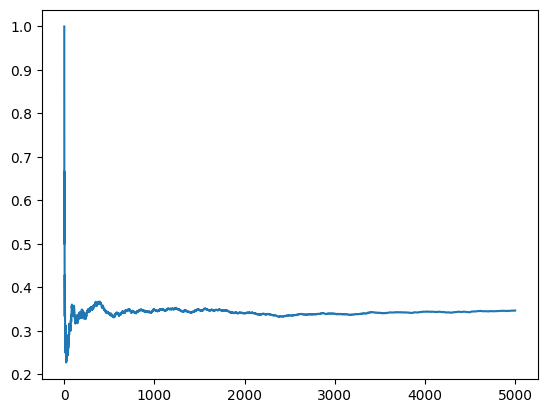

In [100]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos %%

In [90]:
print(np.mean(X), np.std(X)) #calcula media, desviacion estandar

0.38462818080953515 0.06607964630569356


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [103]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [105]:
Y=modelo(120)


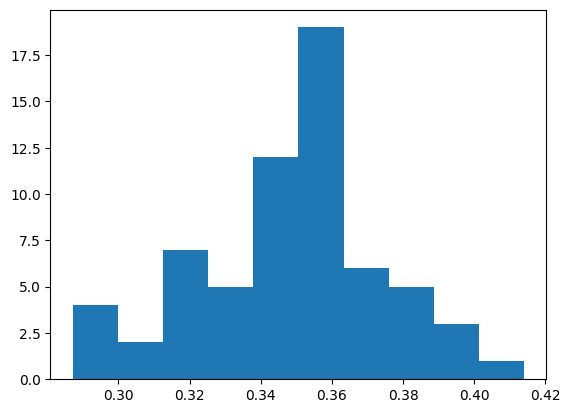

In [106]:
plt.hist(Y)
plt.show()

In [94]:
print(np.mean(Y), np.std(Y))

0.3442460637113564 0.009189762157204164


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

la formula se deriva del teorema del limite central, del cual sabemos que \
$Z_1 = (\bar{x} - \mu_{\bar{x}}) /s = (\bar{x} - \mu) / (s / \sqrt{n})
$\
al despejar $\mu$\
$\mu = {\bar{x}} \pm Z_1 (s / \sqrt {n})$\
Pero sabemos que ${\bar{x}}$ es simetrica por lo que\
$$\bar{x}-z_1 \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_1\cdot \frac{s}{\sqrt{n}}$$
$Z_1= Z_{\alpha/2}$ ya que $\alpha/2$ corresponde a la cola de cada lado de la distribucion normal, sustituimos y nos queda:\
$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$
Ahora dado que el nivel de seguridad es de 95%, el nivel de significancia ($\alpha$)=0.05 por lo que $Z_{\alpha/2}$= 1.96


In [95]:
np.mean(Y)  #media

0.3442460637113564

In [96]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) # nivel de confianza

(0.341698791600927, 0.34679333582178584)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

esta desigualdad garantiza que el tamaño de muestra sea lo suficientemente grande como para que la estimación resultante sea confiable con el margen de error especificado y el nivel de confianza deseado.

In [108]:
N = (2*np.std(X)*1.96/0.01)**2

In [109]:
print(N)

31.47533793243119


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

##Teorema de la resta de dos normales:
Si $X \sim N(\mu_X, \sigma_X^2)$ y $ W \sim N(\mu_W, \sigma_W^2)$ son dos variables aleatorias normales independientes, entonces la diferencia \( S = X - W \) se puede escribir como:\
X ~ $N(\mu_x, \sigma_x^2)$ - W ~ $N(\mu_w, \sigma_w^2$)= $ S$ ~ $ (\mu_x- \mu_w, \sigma_x^2 + \sigma_w^2$)\
usando el teorema tenemos que\
 $x_2 - x_1$ ~ $N(-0.02,0.05)$

 Donde\
la media es: $\mu_s$= 1.48-1.5=-0.02\
       la varianza es : $\sigma^2$= 0.0025\
       desviacion estandar: $\sqrt(0.0025)$=0.05

In [15]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [16]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0008616108240727671

Conclusion:\
a)La probabilidad de que haya interferencia:0.34\
Esto lo observamos por la simulacion y por que se desarrollo de manera analitica\
b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$, como vemos en la grfica al repetir 5000 veces el experimento empezzaremos a entrar en el estado estacionario. Por la formula vemos que es conveniente repe